In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
# Read the CSV
airplane_df = pd.read_csv("../airplane_df.csv", encoding = "latin-1", low_memory = False)

In [5]:
# United States (and its territories) only
airplane_df = airplane_df[airplane_df["Country"] == "United States"]

In [6]:
# Airplane Damage
airplane_df["Aircraft.damage"].value_counts()

Aircraft.damage
Substantial    20523
Destroyed       2673
Minor            508
Unknown           43
Name: count, dtype: int64

In [7]:
# Drop null values in Aircraft.damage column
airplane_df.dropna(subset=["Aircraft.damage"], inplace = True)

In [8]:
# KEEP THIS CODE
# Analyzing data if Unknown should be dropped
# unknown_aircraft_damage = airplane_df[airplane_df["Aircraft.damage"] == "Unknown"]

In [9]:
# KEEP THIS CODE
# Analyzing data if Unknown should be dropped
# unknown_aircraft_damage.sort_values("Total.Uninjured", ascending=False)

Conclusion: Drop Unknown!

In [10]:
# Drop Aircraft Damage with the Unknown value
airplane_df = airplane_df.drop(airplane_df[airplane_df["Aircraft.damage"] == "Unknown"].index)

In [11]:
# Analyizing Boeing
airplane_df = airplane_df[airplane_df["Make"] == "BOEING"]

In [12]:
# Drop airplanes with null values
airplane_df.dropna(subset=["Number.of.Engines"], inplace = True)

In [13]:
# Drop airplanes with 1.0 Engine
airplane_df = airplane_df.drop(airplane_df[airplane_df["Number.of.Engines"] == 1.0].index)

In [14]:
# Drop airplanes are that are not commercial, retired
airplane_df = airplane_df.drop(airplane_df[airplane_df.Model.isin(["KC-135A", "MD-10-10F", "MD-11F", "MD", "B-17G", "B17"])].index)

In [15]:
airplane_df.update(airplane_df[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]].fillna(0))

In [16]:
# Add Non-Fatal column
non_fatal = airplane_df["Total.Serious.Injuries"] + airplane_df["Total.Minor.Injuries"] + airplane_df["Total.Uninjured"]
airplane_df.insert(27, "Total.Non-Fatal", non_fatal)

In [17]:
# Add Total.People column
total_people = airplane_df["Total.Fatal.Injuries"] + airplane_df["Total.Serious.Injuries"] + airplane_df["Total.Minor.Injuries"] + airplane_df["Total.Uninjured"]
airplane_df.insert(28, "Total.People", total_people)

In [18]:
airplane_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Non-Fatal,Total.People,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
288,20020917X02336,Incident,LAX82IA075,1982-02-15,"ONTARIO, CA",United States,NaN,NaN,ONT,ONTARIO INTERNATIONAL,Incident,Minor,Airplane,N73717,BOEING,B737-2H4,No,2.0,Turbo Jet,Part 121: Air Carrier,SCHD,Unknown,Aircal,0.0,0.0,0.0,119.0,119.0,119.0,IMC,Approach,Probable Cause,15-02-1983,CA
602,20020917X02279,Accident,LAX82FA119,1982-03-24,"MARANA, AZ",United States,NaN,NaN,MJC,MARANA AIRPARK,Non-Fatal,Substantial,Airplane,N752TA,BOEING,707-123B,No,4.0,Turbo Jet,Part 91: General Aviation,NaN,Ferry,NaN,0.0,0.0,0.0,7.0,7.0,7.0,VMC,Landing,Probable Cause,24-03-1983,AZ
719,20020917X01904,Incident,CHI82IA117,1982-04-09,"YOUNGSTOWN, OH",United States,NaN,NaN,YNG,YOUNGSTOWN MUNICIPAL,Incident,Minor,Airplane,N7627U,BOEING,727-200,No,3.0,Turbo Fan,Part 121: Air Carrier,SCHD,Unknown,United Airlines,0.0,0.0,0.0,108.0,108.0,108.0,IMC,Landing,Probable Cause,09-04-1983,OH
805,20020917X02079,Accident,FTW82DA139,1982-04-18,"AUSTIN, TX",United States,NaN,NaN,AUS,AUSTIN MUNI,Non-Fatal,Substantial,Airplane,N32717,BOEING,727-200,No,3.0,Turbo Fan,Part 121: Air Carrier,SCHD,Unknown,"Continental Airlines, Inc.",0.0,0.0,0.0,68.0,68.0,68.0,VMC,Landing,Probable Cause,18-04-1983,TX
1598,20020917X04065,Incident,NYC82IA137,1982-07-05,"FLUSHING, NY",United States,NaN,NaN,LGA,LAGUARDIA,Incident,Minor,Airplane,CGAAA,BOEING,727-233,No,3.0,Turbo Fan,Part 129: Foreign,SCHD,NaN,Air Canada,0.0,0.0,0.0,74.0,74.0,74.0,VMC,Climb,Probable Cause,04-12-2014,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27184,20211001104015,Accident,DCA22LA002,2021-09-27,"NEWARK, NJ",United States,404133N,0074107W,KEWR,Newark Liberty International A,Non-Fatal,Substantial,Airplane,N12125,BOEING,757-224,No,2.0,NaN,121,SCHD,NaN,United Airlines,0.0,0.0,0.0,172.0,172.0,172.0,NaN,NaN,NaN,NaN,NJ
27384,20211206104355,Accident,DCA22LA038,2021-11-29,"MIAMI, FL",United States,252812N,0801012W,NaN,NaN,Non-Fatal,Substantial,Airplane,N705CK,BOEING,747-4B5F,No,4.0,NaN,121,NSCH,NaN,KALITTA AIR LLC,0.0,0.0,0.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,FL
27516,20220204104596,Incident,ENG22FA009,2022-02-04,"LAS VEGAS, NV",United States,036435N,0115831W,LAS,Harry Reid International Airpo,Non-Fatal,Minor,Airplane,N817SY,BOEING,737-8K2,No,2.0,NaN,121,SCHD,NaN,"Sun Country Airlines, Inc.",0.0,0.0,0.0,56.0,56.0,56.0,VMC,NaN,NaN,09-03-2022,NV
27542,20220217104662,Incident,ENG22WA013,2022-02-10,"LANSERIA, OF",United States,026647S,0028046E,NaN,NaN,Non-Fatal,Minor,Airplane,ZS-ZWD,BOEING,737,No,2.0,NaN,NUSC,SCHD,NaN,Kulula,0.0,0.0,0.0,163.0,163.0,163.0,NaN,NaN,NaN,04-03-2022,OF


In [19]:
# 707
models_707 = list(airplane_df["Model"][airplane_df["Model"].str.contains("707")].value_counts().keys())
dict_707 = {key: "707" for key in models_707}
airplane_df["Model"] = airplane_df["Model"].replace(dict_707)

In [20]:
# 727
models_727 = list(airplane_df["Model"][airplane_df["Model"].str.contains("727")].value_counts().keys())
dict_727 = {key: "737" for key in models_727}
airplane_df["Model"] = airplane_df["Model"].replace(dict_727)

In [21]:
# 737
models_737 = list(airplane_df["Model"][airplane_df["Model"].str.contains("737")].value_counts().keys())
dict_737 = {key: "737" for key in models_737}
airplane_df["Model"] = airplane_df["Model"].replace(dict_737)

In [22]:
# 747
models_747 = list(airplane_df["Model"][airplane_df["Model"].str.contains("747")].value_counts().keys())
dict_747 = {key: "747" for key in models_747}
airplane_df["Model"] = airplane_df["Model"].replace(dict_747)

In [23]:
# 757
models_757 = list(airplane_df["Model"][airplane_df["Model"].str.contains("757")].value_counts().keys())
dict_757 = {key: "757" for key in models_757}
airplane_df["Model"] = airplane_df["Model"].replace(dict_757)

In [24]:
# 767
models_767 = list(airplane_df["Model"][airplane_df["Model"].str.contains("767")].value_counts().keys())
dict_767 = {key: "767" for key in models_767}
airplane_df["Model"] = airplane_df["Model"].replace(dict_767)

In [25]:
# 777
models_777 = list(airplane_df["Model"][airplane_df["Model"].str.contains("777")].value_counts().keys())
dict_777 = {key: "777" for key in models_777}
airplane_df["Model"] = airplane_df["Model"].replace(dict_777)

<Axes: xlabel='Model'>

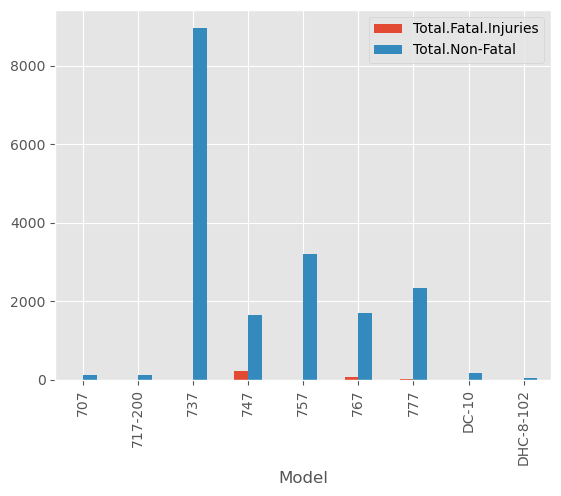

In [28]:
plt.style.use("ggplot")
airplane_df[["Model", "Total.Fatal.Injuries", "Total.Non-Fatal"]].groupby("Model").sum().plot(kind = "bar")